# drug consumption

## Preprocessing

### data import + basic processings

In [1]:
#installation sklearn_extra
!pip install scikit-learn-extra

In [2]:
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, KMeans
import numpy as np
from scipy.spatial import distance
import sklearn_extra.cluster
from sklearn.metrics import adjusted_rand_score, rand_score
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
import plotly.express as px
import io
import pandas as pd
from numpy.random import default_rng
import matplotlib.cm
import matplotlib as mpl

####  matplotlib settings



In [3]:
mpl.rcParams['figure.figsize'] = (10,6)

####  data import

In [4]:
# get csv file on UCI website

import requests
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data"
r = requests.get(url)
with open("./drug_consumption.data",'wb') as output_file:
    output_file.write(r.content)
    
# conversion CSV to pandas dataframe
df = pd.read_csv("./drug_consumption.data", names=[
"ID",
"Age",
"Gender",
"Education",
"Country",
"Ethnicity",
"Nscore",
"Escore",
"Oscore",
"Ascore",
"Cscore",
"Impulsive",
"SS",
"Alcohol",
"Amphet",
"AMyl",
"Benzos",
"Caff",
"Cannabis",
"Choc",
"Coke",
"Crack",
"Ecstasy",
"Heroin",
"Ketamine",
"Legalh",
"LSD",
"Meth",
"Mushrooms",
"Nicotine",
"Semer",
"VSA"])

colDrog = [
#"Alcohol",
"Amphet",
"AMyl",
"Benzos",
#"Caff",
"Cannabis",
#"Choc",
"Coke",
"Crack",
"Ecstasy",
"Heroin",
"Ketamine",
"Legalh",
"LSD",
"Meth",
"Mushrooms",
"Nicotine",
#"Semer",
"VSA"]

colPersoEtatciv = ["Age",
"Gender",
"Education",
"Country",
#"Ethnicity",
"Nscore",
"Escore",
"Oscore",
"Ascore",
"Cscore",
"Impulsive",
"SS"]

In [5]:
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


### Deleting some variables 

In [6]:
cl2numMap = {"CL0": 0, "CL1": 1, "CL2": 2, "CL3": 3, "CL4": 4, "CL5": 5, "CL6": 6}

<AxesSubplot:>

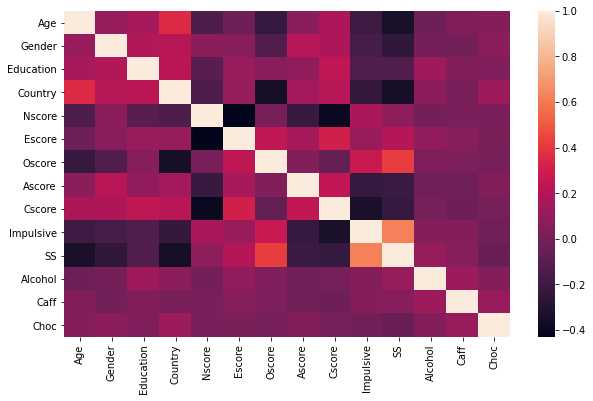

In [8]:
#justification passe-bas: on calcule la corrélation entre explicatives et drogues nulles
alcnum = df[["Alcohol", "Caff", "Choc"]].applymap(cl2numMap.get)
sns.heatmap(pd.concat([df[colPersoEtatciv], alcnum], axis=1).corr())

In [9]:
df.drop(df[df["Semer"] != "CL0" ].index)
df = df.drop(columns=['Semer', 'Choc', 'Alcohol', 'Caff', 'Ethnicity'])
df

,ID,Age,Gender,Education,Country,Nscore,Escore,Oscore,Ascore,Cscore,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0
4,5,0.49788,0.48246,1.98437,0.96082,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,CL0,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,CL0,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,CL0,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,CL0,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0


In [10]:
# Check for Nicotine consumption distribution 
print(np.count_nonzero(df["Nicotine"].values == "CL0"))
print(np.count_nonzero(df["Nicotine"].values == "CL1"))
print(np.count_nonzero(df["Nicotine"].values == "CL2"))
print(np.count_nonzero(df["Nicotine"].values == "CL3"))
print(np.count_nonzero(df["Nicotine"].values == "CL4"))
print(np.count_nonzero(df["Nicotine"].values == "CL5"))
print(np.count_nonzero(df["Nicotine"].values == "CL6"))

428
193
204
185
108
157
610


### get dummie variables from drug consumption categorical variables.

Depending on the "gravity" of the drug used, the dummy is set to a different frontier

In [11]:
#{Never, >10years} -> 0
#{<10years, <1year, <1month, <1week, yesterday} -> 1

from copy import deepcopy

def cl2bin(cl):
  return 0 if (cl == "CL0" or cl == "CL1") else 1

def cl3bin(cl):
  return 0 if (cl == "CL0" or cl == "CL1" or cl == "CL2" or cl == 0) else 1


def cl4bin(cl):
  return 0 if (cl == "CL0" or cl == "CL1" or cl == "CL2") else 1


# get drug colummns "colDrog"
drogBin=deepcopy(df)
drogBin = drogBin[colDrog].applymap(cl2bin) #et on applique à chaque élément la fonction de binarisation

# nicotine et cannabis get a different preprocessing
df_tmp_C_N=deepcopy(df)
df_tmp_C_N['Cannabis'] = df_tmp_C_N['Cannabis'].map({'CL0':0,
                                      'CL1':0,
                                      'CL2':0,
                                      'CL3':1,
                                      'CL4':1,
                                      'CL5':1,
                                      'CL6':1}, na_action=None)
df_tmp_C_N['Nicotine'] = df_tmp_C_N['Nicotine'].map({'CL0':0,
                                      'CL1':0,
                                      'CL2':0,
                                      'CL3':1,
                                      'CL4':1,
                                      'CL5':1,
                                      'CL6':1}, na_action=None)

drogBin_Nicotine_Cannabis = df_tmp_C_N[colDrog].applymap(cl3bin) #et on applique à chaque élément la fonction de binarisation

#Colonnes en mettant cl2 à 0 pour toutes les drogues
df_tmp_CL2_0=deepcopy(df)
df_tmp_CL2_0=df_tmp_CL2_0[colDrog].applymap(cl4bin)

dfbin = pd.concat([df[colPersoEtatciv], drogBin], axis=1)

In [13]:
dfbin.head()

,Age,Gender,Education,Country,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,0.49788,0.48246,-0.05921,0.96082,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,...,0,0,0,0,0,0,0,0,1,0
1,-0.07854,-0.48246,1.98437,0.96082,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,...,0,1,0,1,0,1,1,0,1,0
2,0.49788,-0.48246,-0.05921,0.96082,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,...,0,0,0,0,0,0,0,0,0,0
3,-0.95197,0.48246,1.16365,0.96082,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,...,0,0,0,1,0,0,0,0,1,0
4,0.49788,0.48246,1.98437,0.96082,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,...,0,0,0,0,0,0,0,1,1,0


## Drug consumption clustering

### Results from "The Five Factor Model of personality and evaluation of drug consumption risk*, E. Fehrman et. al."

- The Heroin pleiad (*heroinPl*) includes **crack**, **cocaine**, **methadone**, and **heroin**. 
- The Ecstasy pleiad (*ecstasyPl*)includes **amphetamines**, **cannabis**, **cocaine**, **ketamine**, **LSD**, **magic mushrooms**, **legal highs**, and **ecstasy**.
- The Benzodiazepines pleiad (*benzoPl*) includes **methadone**,**amphetamines**, and **cocaine**.


In [ ]:
#calcul des inerties intra-ensembles pour les ensembles proposées par E. Fehrman et ses potos

heroinPlCol = ["Crack", "Coke", "Meth", "Heroin"]
ecstasyPlCol = ["Amphet", "Cannabis", "Coke", "Ketamine", "LSD", "Mushrooms", "Legalh", "Ectasy" ]
benzoPl = ["Meth", "Amphet", "Coke"]

In [ ]:
#code récupéré sur le net (https://stackoverflow.com/questions/40313420/how-to-get-inertia-value-for-each-k-means-cluster-using-scikit-learn)
#pour avoir une variance intra-classe
# à partir des distances du clustering
#model = cluster.MiniBatchKMeans(n_clusters=n)
#distances = model.fit_transform(trainSamples)
#variance = 0
#i = 0
#for label in model.labels_:
#    variance = variance + distances[i][label]
#    i = i + 1

In [ ]:
#@title (util: plot_Shepard and plot_dendrogram)
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.manifold import MDS
from scipy.spatial.distance import cdist

def plot_Shepard(mds_model, plot=True):
    """Affiche le diagramme de Shepard et retourne un couple contenant les
    dissimilarités originales e les colonnes de drogue binariséet les distances apprises par le
    modèle.
    """

    assert isinstance(mds_model, MDS)

    # Inter-distances apprises
    dist = cdist(mds_model.embedding_, mds_model.embedding_)
    idxs = np.tril_indices_from(dist, k=-1)
    dist_mds = dist[idxs]

    # Inter-distances d'origine
    dist = mds_model.dissimilarity_matrix_
    dist_orig = dist[idxs]

    dists = np.column_stack((dist_orig, dist_mds))

    if plot:
        f, ax = plt.subplots()
        range = [dists.min(), dists.max()]
        ax.plot(range, range, 'r--')
        ax.scatter(*dists.T)
        ax.set_xlabel('Dissimilarités')
        ax.set_ylabel('Distances')

    return (*dists.T,)


# Taken from https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    default_kwargs = dict(leaf_font_size=10)
    default_kwargs.update(kwargs or {})

    dendrogram(linkage_matrix, **default_kwargs)




# def plot_clustering(data, labels, markers=None, ax=None, **kwargs):
#     """Affiche dans leur premier plan principal les données `data`,
# colorée par `labels` avec éventuellement des symboles `markers`.
#     """

#     if ax is None:
#         ax = plt.gca()

#     # Reduce to two dimensions
#     if data.shape[1] == 2:
#         data_pca = data.to_numpy()
#     else:
#         pca = PCA(n_components=2)
#         data_pca = pca.fit_transform(data)

#     COLORS = np.array(['blue', 'green', 'red', 'purple', 'gray', 'cyan'])
#     _, labels = np.unique(labels, return_inverse=True)
#     colors = COLORS[labels]

#     if markers is None:
#         ax.scatter(*data_pca.T, c=colors)
#     else:
#         MARKERS = "o^sP*+xD"

#         # Use integers
#         markers_uniq, markers = np.unique(markers, return_inverse=True)

#         for marker in range(len(markers_uniq)):
#             data_pca_marker = data_pca[markers == marker, :]
#             colors_marker = colors[markers == marker]
#             ax.scatter(*data_pca_marker.T, c=colors_marker, marker=MARKERS[marker])

#     if 'centers' in kwargs and 'covars' in kwargs:
#         if data.shape[1] == 2:
#             centers_2D = kwargs['centers']
#             covars_2D = kwargs['covars']
#         else:
#             centers_2D = pca.transform(kwargs["centers"])
#             covars_2D = [
#                 pca.components_ @ c @ pca.components_.T
#                 for c in kwargs['covars']
#             ]

#         p = 0.9
#         sig = norm.ppf(p**(1/2))

#         for i, (covar_2D, center_2D) in enumerate(zip(covars_2D, centers_2D)):
#             v, w = linalg.eigh(covar_2D)
#             print(v)
#             v = 2. * sig * np.sqrt(v)

#             u = w[0] / linalg.norm(w[0])
#             if u[0] == 0:
#                 angle = np.pi / 2
#             else:
#                 angle = np.arctan(u[1] / u[0])

#             color = COLORS[i]
#             angle = 180. * angle / np.pi  # convert to degrees
#             ell = mpl.patches.Ellipse(center_2D, v[0], v[1], 180. + angle, color=color)
#             ell.set_clip_box(ax.bbox)
#             ell.set_alpha(0.5)
#             ax.add_artist(ell)

#     return ax


In [ ]:
#@title util: inertiaByLabels
#CAH
def inertiaByLabels(data, labels, n_clusters, distance=distance.euclidean):
  clusters = {}
  for i in range(n_clusters):
    clusters[i] = []
  for i in range(labels.size):
    clusters[labels[i]].append(data[i])
  
  #calculer le centre de chaque cluster
  means = {}
  for i in range(n_clusters):
    means[i] = np.full_like(clusters[i][0],0)
    for a in clusters[i]:
      means[i] = means[i] + a
    means[i] = means[i] * 1/len(clusters[i])

  #calculer la somme des distances au carré des éléments à leur centre de cluster
  inertia = 0
  for i in range(labels.size):
    inertia = inertia + (distance(means[labels[i]], data[i]))**2

  return inertia

decorr dice


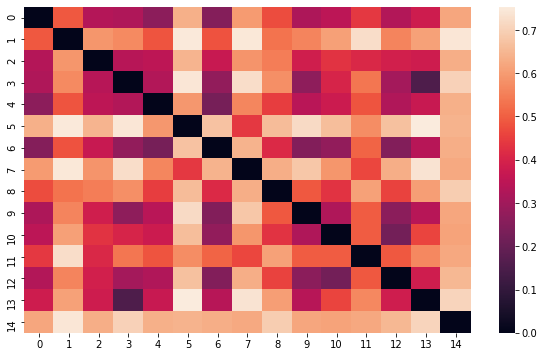

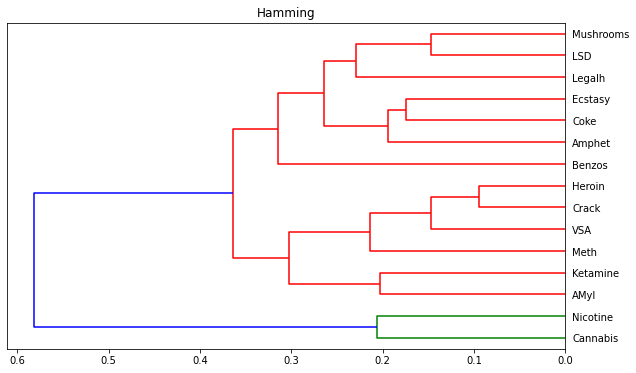

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

In [ ]:


corr =drogBin.corr() # matrice de corrélation
#sns.heatmap(diss)
diss=1-corr
#print("diss basique")
#print(diss)

n,m = drogBin.shape
drogBin_tmp = drogBin.to_numpy().T

#on calcule des distances de dice et de jaccard dans l'espace variables-individus
#(les individus sont les drogues, les variables sont les personnes)
decor_dice = distance.squareform(distance.pdist(drogBin_tmp,metric='dice'))
decor_jaccard = distance.squareform(distance.pdist(drogBin_tmp,metric='jaccard'))
decor_hamming = distance.squareform(distance.pdist(drogBin_tmp,metric='hamming'))
print("decorr dice")
sns.heatmap(decor_dice)
plt.show()

# on fait des classifications ascendantes hiérarchiques
# en fournissant les distances qu'on a déjà calculées,
# ou en demandant un calcul euclidien

cls_cah = AgglomerativeClustering(
    affinity="precomputed", 
    linkage="complete", # critère du saut max: en créant la hiérarchie, le critère que l'algo de CAH va tenter de minimiser entre deux classes est la distance maximale parmi toutes les observations
    distance_threshold = 0,
    n_clusters=None
)
cls_cah.fit(decor_dice)
#plot_dendrogram(cls_cah, labels=drogBin.columns, orientation='left')
#plt.title("Dice")
#plt.show()

cls_cah = AgglomerativeClustering(
    affinity="precomputed", 
    linkage="complete", # criterion 
    distance_threshold = 0,
    n_clusters=None
)
cls_cah.fit(decor_jaccard)
#plot_dendrogram(cls_cah, labels=drogBin.columns, orientation='left')
#plt.title("Jaccard")
#plt.show()

cls_cah = AgglomerativeClustering(
    affinity="precomputed", 
    linkage="complete", # criterion 
    distance_threshold = 0,
    n_clusters=None
)
cls_cah.fit(decor_hamming)
plot_dendrogram(cls_cah, labels=drogBin.columns, orientation='left')
plt.title("Hamming")
plt.show()

cls_cah = AgglomerativeClustering(
    affinity="euclidean", 
    linkage="complete", # criterion 
    distance_threshold = 0,
    n_clusters=None
)
cls_cah.fit(drogBin_tmp)
#plot_dendrogram(cls_cah, labels=drogBin.columns, orientation='left')
#plt.title("Euclidien")
#plt.show()

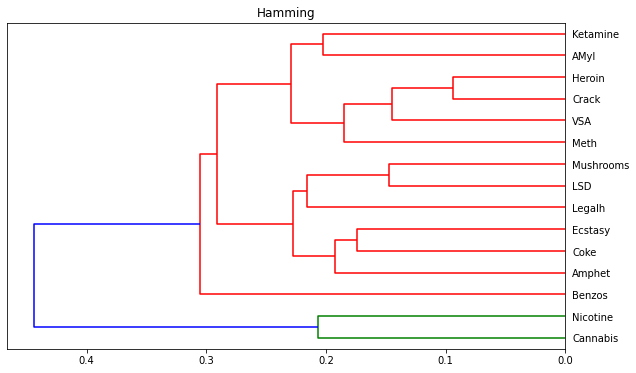

In [ ]:
#@title CAH avec saut moyen
#cls_cah = AgglomerativeClustering(
#    affinity="precomputed", 
#    linkage="average", # critère du saut max: en créant la hiérarchie, le critère que l'algo de CAH va tenter de minimiser entre deux classes est la distance maximale parmi toutes les observations
#    distance_threshold = 0,
#    n_clusters=None
#)
#cls_cah.fit(decor_dice)
#plot_dendrogram(cls_cah, labels=drogBin.columns, orientation='left')
#plt.title("Dice average")
#plt.show()

#cls_cah = AgglomerativeClustering(
#    affinity="precomputed", 
#    linkage="average", # criterion 
#    distance_threshold = 0,
#    n_clusters=None
#)
#cls_cah.fit(decor_jaccard)
#plot_dendrogram(cls_cah, labels=drogBin.columns, orientation='left')
#plt.title("Jaccard average")
#plt.show()

cls_cah = AgglomerativeClustering(
    affinity="precomputed", 
    linkage="average", # criterion 
    distance_threshold = 0,
    n_clusters=None
)
cls_cah.fit(decor_hamming)
plot_dendrogram(cls_cah, labels=drogBin.columns, orientation='left')
plt.title("Hamming")
plt.show()

#cls_cah = AgglomerativeClustering(
#    affinity="euclidean", 
#    linkage="average", # criterion 
#    distance_threshold = 0,
#    n_clusters=None
#)
#cls_cah.fit(drogBin_tmp)
#plot_dendrogram(cls_cah, labels=drogBin.columns, orientation='left')
#plt.title("Euclidien average")
#plt.show()

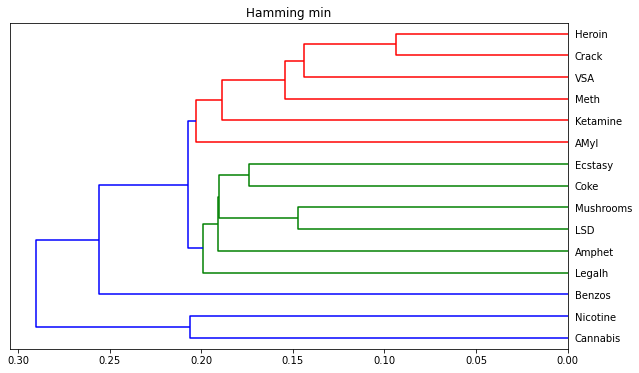

In [ ]:
#@title CAH du saut min
#cls_cah = AgglomerativeClustering(
#    affinity="precomputed", 
#    linkage="single", # critère du saut max: en créant la hiérarchie, le critère que l'algo de CAH va tenter de minimiser entre deux classes est la distance maximale parmi toutes les observations
#    distance_threshold = 0,
#    n_clusters=None
#)
#cls_cah.fit(decor_dice)
#plot_dendrogram(cls_cah, labels=drogBin.columns, orientation='left')
#plt.title("Dice min")
#plt.show()

#cls_cah = AgglomerativeClustering(
#    affinity="precomputed", 
#    linkage="single", # criterion 
#    distance_threshold = 0,
#    n_clusters=None
#)
#cls_cah.fit(decor_jaccard)
#plot_dendrogram(cls_cah, labels=drogBin.columns, orientation='left')
#plt.title("Jaccard min")
#plt.show()

cls_cah = AgglomerativeClustering(
    affinity="precomputed", 
    linkage="single", # criterion 
    distance_threshold = 0,
    n_clusters=None
)
cls_cah.fit(decor_hamming)
plot_dendrogram(cls_cah, labels=drogBin.columns, orientation='left')
plt.title("Hamming min")
plt.show()

#cls_cah = AgglomerativeClustering(
#    affinity="euclidean", 
#    linkage="single", # criterion 
#    distance_threshold = 0,
#    n_clusters=None
#)
#cls_cah.fit(drogBin_tmp)
#plot_dendrogram(cls_cah, labels=drogBin.columns, orientation='left')
#plt.title("Euclidien min")
#plt.show()

In [ ]:
cah_compl_cl0 = ["Mushrooms", "LSD", "Legalh", "Ecstasy", "Coke", "Amphet", "Benzos"]
cah_compl_cl1 = ["Heroin", "Crack", "VSA", "Meth", "Ketamine", "AMyl"]
cah_compl_cl2 = ["Nicotine", "Cannabis"]
cah_compl = [cah_compl_cl0, cah_compl_cl1, cah_compl_cl2]
cah_compl_labels = np.sum([cl*np.array([drog in cah_compl[cl] for drog in colDrog]) for cl in range(len(cah_compl))], axis=0);

#inertia des classes obtenues
inertiaByLabels(decor_dice, cah_compl_labels, 3, distance=distance.hamming)

15.0

### Clustering par les k-médoïdes

While KMeans tries to minimize the within cluster sum-of-squares, KMedoids tries to minimize the sum of distances between each point and the medoid of its cluster. The medoid is a data point (unlike the centroid) which has the least total distance to the other members of its cluster. The use of a data point to represent each cluster’s center allows the use of any distance metric for clustering.

In [ ]:
partitionsRandomInit = [sklearn_extra.cluster.KMedoids(n_clusters=3, metric='precomputed', init='random', max_iter=300).fit(decor_hamming) for i in range(30)]

/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning:

Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).

/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning:

Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).



In [ ]:
def inertiaAndRanddistancesMeanVar(init, n_clusters):
  print(init, "init")
  partitions = [sklearn_extra.cluster.KMedoids(n_clusters=n_clusters,
  metric='precomputed',
  init=init,
  max_iter=300).fit(decor_hamming) for i in range(30)]

  # p.inertia_ : Sum of distances of samples to their closest cluster center.
  inertias = np.array([p.inertia_ for p in partitions])
  print("inertia_ mean:", inertias.mean())
  print("inertia_ var:", inertias.var())


  labels = [p.labels_ for p in partitions]
  #on calcul une distance de rand entre toutes les partitions
  rand_distance = lambda a,b : 1 - rand_score(a,b)
  rand_distances = distance.cdist(labels, labels, rand_distance)
  #distances: la matrice est symétrique et la diagonale est remplie de 1
  #on extrait les éléments du triangle supérieur
  rand_distances = np.triu(rand_distances)
  sh = rand_distances.shape[0]
  rand_distances = np.reshape(rand_distances, rand_distances.size)
  #on enlève ceux de la diagonale
  diag_indexes = [sh*n for n in range(sh)]
  rand_distances = np.delete(rand_distances, diag_indexes)
  print("rand distances mean:", rand_distances.mean())
  print("rand distances var:", rand_distances.var())

In [ ]:
inertiaAndRanddistancesMeanVar('random', 3)

/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning:

Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).

/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning:

Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).

/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning:

Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).

/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning:

Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).

/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning:

Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be label

random init
inertia_ mean: 2.4424049513704684
inertia_ var: 0.032205070667414085
rand distances mean: 0.10509031198686371
rand distances var: 0.021790910471732622


In [ ]:
inertiaAndRanddistancesMeanVar('k-medoids++', 3)

k-medoids++ init
inertia_ mean: 2.290928381962865
inertia_ var: 0.00537661045013098
rand distances mean: 0.023897099069512855
rand distances var: 0.004047585314127412


In [ ]:
inertiaAndRanddistancesMeanVar('heuristic', 3)

heuristic init
inertia_ mean: 2.483289124668434
inertia_ var: 7.888609052210118e-31
rand distances mean: 0.0
rand distances var: 0.0


La "somme des inerties" intra-classe est plus faible avec une initialisation "k-médoïdes++" ou 'heuristic' qu'avec une initialisation aléatoire. Par ailleurs, avec l'init. aléa., souvent, l'algorithme n'arrive pas à former plus de deux classes.

L'initialisation 'heuristic' est déterministe. L'initialisation k-médoïdes est "plus déterministe" que l'initialisation random.

Même démarche avec 4 clusters (démarche pour le nb de clusters plus bas). random ne marche plus beaucoup.

In [ ]:
inertiaAndRanddistancesMeanVar('k-medoids++', 4)

k-medoids++ init
inertia_ mean: 2.0209725906277636
inertia_ var: 0.0011717192753687789
rand distances mean: 0.05288451012588943
rand distances var: 0.004338631408876581


In [ ]:
inertiaAndRanddistancesMeanVar('heuristic', 4)

heuristic init
inertia_ mean: 2.010610079575598
inertia_ var: 1.9721522630525295e-31
rand distances mean: 0.0
rand distances var: 0.0


Les inerties sont un peu meilleures.

### clustering après application d'une AFTD au tableau de distances de hamming

[]

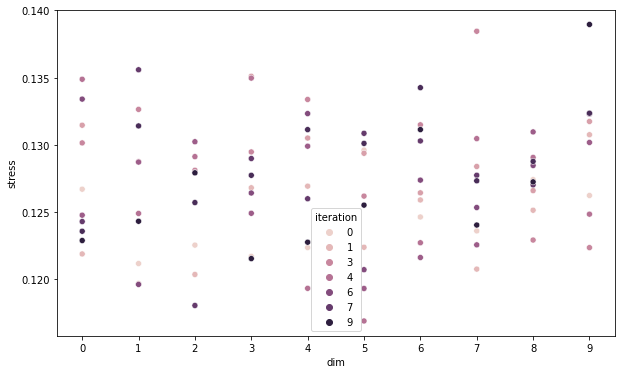

In [ ]:
N_dims = 10
N_iters = 10
def aftd(dim):
  aftd = MDS(n_components=3,
             dissimilarity="precomputed",
             n_init=100) 
  dist_mds = aftd.fit_transform(decor_hamming)
  return [aftd, dist_mds, dim]

aftds = [aftd(n) for n in range (10)]
stresses = [(a[0].stress_,0, a[2]) for a in aftds]
stressesdf = pd.DataFrame(stresses)
aftdss = {}
aftdss[0] = aftds

for i in range(1,N_iters):
  aftds = [aftd(n) for n in range (N_dims)]
  stresses = [(a[0].stress_,i, a[2]) for a in aftds]
  stressesdf = stressesdf.append(stresses)
  aftdss[i] = aftds

stressesdf.columns = ['stress', 'iteration', 'dim']
stressesdf = stressesdf.reset_index(drop=True)

sns.scatterplot(x='dim', y='stress', hue='iteration', data=stressesdf)
plt.xticks(range(N_dims))

plt.plot()



Les initialisations sont aléatoires. On demande 100 initialisations aléatoires différentes, puis on sélectionne le résultat avec le plus faible *stress (sum of squared distance of the disparities and the distances for all constrained points)*.

Malgré cette précaution, on constate du non-déterminisme lorsqu'on exécute l'algorithme 10 fois.

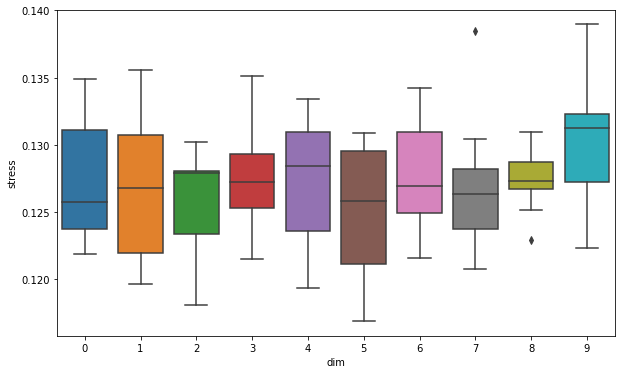

In [ ]:
sns.boxplot(x='dim',
            y='stress',
            data=stressesdf
)

À partir de 2, on ne peut pas vraiment argumenter en faveur d'un nombre de dimensions. On va donc choisir 2 et 3 dimensions pour pouvoir représenter graphiquement les clusterings qu'on va faire.

Pour les dimensions 2 et 3, on récupère donc la MDS avec le plus petit stress.

In [ ]:
dim_2_iter_opt = stressesdf.iloc[stressesdf[stressesdf['dim'] == 2].idxmin()['stress']].iteration
dim_3_iter_opt = stressesdf.iloc[stressesdf[stressesdf['dim'] == 3].idxmin()['stress']].iteration

dim_2_aftd_opt = aftdss[dim_2_iter_opt][2]
dim_3_aftd_opt = aftdss[dim_2_iter_opt][3]

In [ ]:
fig = px.scatter_3d(x=dim_3_aftd_opt[1].T[0,:],
                    y=dim_3_aftd_opt[1].T[1,:],
                    z=dim_3_aftd_opt[1].T[2,:], 
                    #color=labels,
                    text=drogBin.columns)
fig.show()

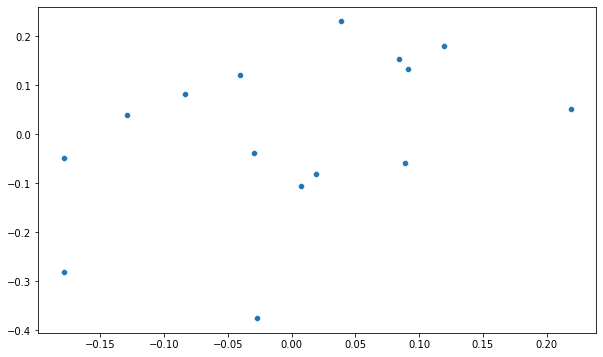

In [ ]:
sns.scatterplot(x=dim_2_aftd_opt[1].T[0,:],
                y=dim_2_aftd_opt[1].T[1,:])
plt.show()

Maintenant on peut appliquer des algos de classification dans des espaces euclidiens, par exemple les k-means.

In [ ]:
#k-means
#avec l'AFTD 2D
print(KMeans(n_clusters=2).fit(dim_2_aftd_opt[1]).inertia_)
print(KMeans(n_clusters=3).fit(dim_2_aftd_opt[1]).inertia_)
print(KMeans(n_clusters=4).fit(dim_2_aftd_opt[1]).inertia_)
print(KMeans(n_clusters=5).fit(dim_2_aftd_opt[1]).inertia_)

#avec l'AFTD 3D
print(KMeans(n_clusters=2).fit(dim_3_aftd_opt[1]).inertia_)
print(KMeans(n_clusters=3).fit(dim_3_aftd_opt[1]).inertia_)
print(KMeans(n_clusters=4).fit(dim_3_aftd_opt[1]).inertia_)
print(KMeans(n_clusters=5).fit(dim_3_aftd_opt[1]).inertia_)

0.4108327928193197
0.25749915730001427
0.18731130478714972
0.1405923183435231
0.4024583074738386
0.25675217195606365
0.1790361231205434
0.13362290489445441


In [ ]:
#CAH
# avec l'AFTD 2D
print(inertiaByLabels(dim_2_aftd_opt[1],
                       AgglomerativeClustering(n_clusters=2)
                       .fit(dim_2_aftd_opt[1])
                       .labels_,
                      2))
print(inertiaByLabels(dim_2_aftd_opt[1],
                       AgglomerativeClustering(n_clusters=3)
                       .fit(dim_2_aftd_opt[1])
                       .labels_,
                      3))
print(inertiaByLabels(dim_2_aftd_opt[1],
                       AgglomerativeClustering(n_clusters=4)
                       .fit(dim_2_aftd_opt[1])
                       .labels_,
                      4))
print(inertiaByLabels(dim_2_aftd_opt[1],
                       AgglomerativeClustering(n_clusters=5)
                       .fit(dim_2_aftd_opt[1])
                       .labels_,
                      5))
#avec l'AFTD 3D
print(inertiaByLabels(dim_3_aftd_opt[1],
                       AgglomerativeClustering(n_clusters=2)
                       .fit(dim_2_aftd_opt[1])
                       .labels_,
                      2))
print(inertiaByLabels(dim_3_aftd_opt[1],
                       AgglomerativeClustering(n_clusters=3)
                       .fit(dim_2_aftd_opt[1])
                       .labels_,
                      3))
print(inertiaByLabels(dim_3_aftd_opt[1],
                       AgglomerativeClustering(n_clusters=4)
                       .fit(dim_2_aftd_opt[1])
                       .labels_,
                      4))
print(inertiaByLabels(dim_3_aftd_opt[1],
                       AgglomerativeClustering(n_clusters=5)
                       .fit(dim_2_aftd_opt[1])
                       .labels_,
                      5))

0.4263437222513041
0.2959822655566691
0.21156121131679392
0.14231190744348585
0.42730646908945596
0.29697145112840645
0.21018885493682013
0.13587483699870948


Il n'y a pas de grosse différence de perf du clustering lorsqu'on fait varier le nombre de dimensions de l'espace d'arrivée de l'AFTD, $\mathbb{R}^3$ est très légèrement meilleur que $\mathbb{R}^2$.

Pas de différence de perf notable entre un K-means avec les param par défaut et une CAH avec les paramètres par défaut.

Le papier de référence recommandait de constituer 3 "pléïades", c'est-à-dire une "classification faible" où les ensembles ont des intersections non nulles.

Dans la mesure où on veut faire une partition, il est normal qu'on obtienne de meilleurs résultats avec un nombre d'ensembles plus élevé.

Dans la mesure où manquons de connaissances scientifiques sur le sujet (chimie et médecine), et qu'on obtient des inerties intra-classes déjà faibles avec 4 clusters, nous ne tenterons pas d'augmenter ce nombre.

Voici une représentation des 4 clusters obtenus en k-means après l'AFTD vers $\mathbb{R}^3$:

In [ ]:
labels_km_aftd_4cl = AgglomerativeClustering(n_clusters=4).fit(dim_2_aftd_opt[1]).labels_

fig = px.scatter_3d(x=dim_3_aftd_opt[1].T[0,:],
                    y=dim_3_aftd_opt[1].T[1,:],
                    z=dim_3_aftd_opt[1].T[2,:], 
                    color=labels_km_aftd_4cl,
                    text=drogBin.columns)
fig.show()

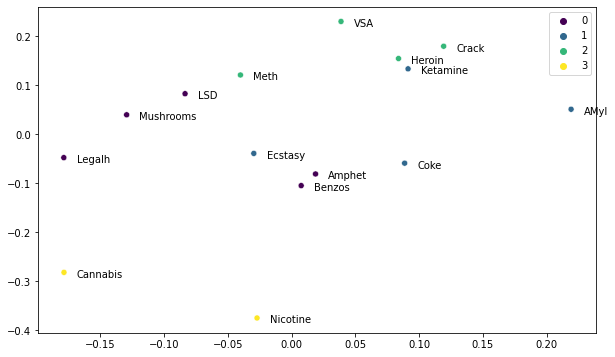

In [ ]:
sns.scatterplot(x=dim_2_aftd_opt[1].T[0,:],
                y=dim_2_aftd_opt[1].T[1,:],
                hue=labels_km_aftd_4cl,
                palette = matplotlib.cm.get_cmap("viridis"))

for i in range(len(drogBin.columns)):
  plt.text(x = dim_2_aftd_opt[1].T[0,i] + 0.01,
           y = dim_2_aftd_opt[1].T[1,i] - 0.01,
          s = drogBin.columns[i])
plt.show()

### hamming->k-médoïdes, ou hamming->AFTD->k-means/cah ?

Il est difficile de comparer directement les performances de ces deux méthodes. On pourrait être tenté de comparer directement les inerties intra-classes, mais l'AFTD a modifié les "positions des points", et les mesures de distance sont différentes.

En revanche, il serait intéressant de comparer les partitions obtenues avec deux méthodes. On calcule un indice de rand:

In [ ]:
labels_kmd_4cl = sklearn_extra.cluster.KMedoids(n_clusters=4,
  metric='precomputed',
  init='k-medoids++',
  max_iter=300).fit(decor_hamming).labels_

labels_km_aftd_4cl = AgglomerativeClustering(n_clusters=4).fit(dim_3_aftd_opt[1]).labels_

rand_score(labels_kmd_4cl, labels_km_aftd_4cl)

0.8857142857142857

Ce processus est bien entendu non déterministe, mais lorsqu'on a un peu de chance, on peut obtenir des partions proches voire égales (rand_score = 1). Ainsi, si l'AFTD a transformé les données, elle n'empêche pas de trouver des résultats proches.

La visualisation 3D rend bien compte du fait que certaines drogues seront toujours dans le même cluster, et que d'autres seront affectées tantôt à l'un, tantôt à l'autre (par exemple Benzos, un peu aussi Ecstasy).

Finalement, puisqu'on obtient les mêmes partitions avec et sans AFTD, on pourrait être tenté de dire que l'AFTD ne transforme pas beaucoup les données. On peut appuyer cette affirmation par le *stress* plutôt bas, autour de 1%: la dissimilarité "ressemble" à la distance euclidienne calculée.

Alors on s'autorise à comparer les *inertias*. On va calculer des *inertias* au sens de la distance de hamming, et des *inertias* au sens de la distance euclidienne.

In [ ]:
#inertia de hamming de la partition obtenue par CAH sur hamming
inertiaByLabels(decor_dice, cah_compl_labels, 3, distance=distance.hamming)

15.0

In [ ]:
#inertia de hamming de la partition obtenue par k-métroïdes sur hamming
inertiaByLabels(decor_dice, labels_kmd_4cl, 4, distance=distance.hamming)

14.0

In [ ]:
#inertia de hamming de la partition obtenue par k-means sur euclidienne
inertiaByLabels(decor_dice, labels_km_aftd_4cl, 4, distance=distance.hamming)

15.0

In [ ]:
#inertia euclidienne de la partition obtenue par CAH sur hamming
inertiaByLabels(decor_dice, cah_compl_labels, 3, distance=distance.euclidean)

3.3911822620536864

In [ ]:
#inertia euclidienne de la partition obtenue par k-métroïdes sur hamming
inertiaByLabels(decor_dice, labels_kmd_4cl, 4, distance=distance.euclidean)

3.1535329894600546

In [ ]:
#inertia euclidienne de la partition obtenue par k-means sur euclidienne
inertiaByLabels(decor_dice, labels_km_aftd_4cl, 4, distance=distance.euclidean)

3.1530670959278058

En fin de compte, on voit que le passage dans l'espace euclidien a artificiellement rendu une partition meilleure qu'une autre: dans l'espace binaire^7, kmd_4cl et km_4cl se valent.

### Classes à la main

Maintenant qu'on a fait de la classification non supervisée, on a déjà identifié quelques classes bien homogènes:

In [ ]:
class0 = ["LSD", "Mushrooms", "Legalh"]
class1 = ["Nicotine", "Cannabis"]
class2 = ["Coke", "Ecstasy"]
class3 = ["Meth", "VSA", "Ketamine", "Heroin", "Crack", "AMyl"]

ainsi que deux *outlier*, Benzos et Amphet

In [ ]:
class4 = ["Benzos"]
class5 = ["Amphet"]

In [ ]:
classes = [class0, class1, class2, class3, class4, class5]
labels = np.sum([cl*np.array([drog in classes[cl] for drog in colDrog]) for cl in range(len(classes))], axis=0)
labels

array([5, 3, 4, 1, 2, 3, 2, 3, 3, 0, 0, 3, 0, 1, 3])

Calculons l'*inertia* de ces classes au sens de la distance euclidienne dans l'espace obtenu après AFTD:

In [ ]:
inertiaByLabels(dim_3_aftd_opt[1], labels, 6)

0.1330254293761832

In [ ]:
inertiaByLabels(decor_hamming, labels, 6, distance=distance.hamming)

13.0

On obtient un résultat un peu meilleur qu'avec les classes formées automatiquement - mais le nombre de classes est plus élevé, c'est un peu de la triche.

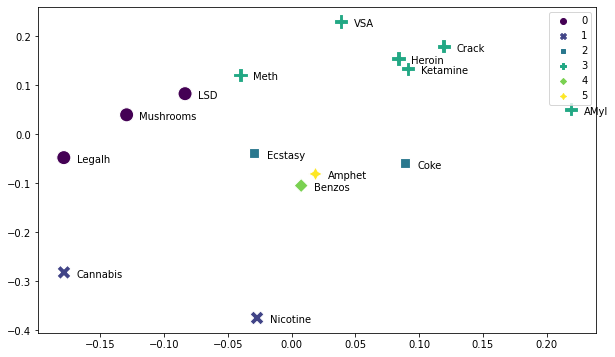

In [ ]:
sns.scatterplot(x=dim_2_aftd_opt[1].T[0,:],
                y=dim_2_aftd_opt[1].T[1,:],
                hue=labels,
                style=labels,
                palette = matplotlib.cm.get_cmap("viridis"),
                s=200)

for i in range(len(drogBin.columns)):
  plt.text(x = dim_2_aftd_opt[1].T[0,i] + 0.01,
           y = dim_2_aftd_opt[1].T[1,i] - 0.01,
          s = drogBin.columns[i])
plt.show()

In [ ]:
fig = px.scatter_3d(x=dim_3_aftd_opt[1].T[0,:],
                    y=dim_3_aftd_opt[1].T[1,:],
                    z=dim_3_aftd_opt[1].T[2,:], 
                    color=labels,
                    text=drogBin.columns)
fig.show()

In [ ]:
fig = px.scatter_3d(x=dim_3_aftd_opt[1].T[0,:],
                    y=dim_3_aftd_opt[1].T[1,:],
                    z=dim_3_aftd_opt[1].T[2,:], 
                    color=labels,
                    text=drogBin.columns)
fig.write_html("./visu-cl.html")

## ACP / individu

In [ ]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import numpy as np

df_indiv=df.iloc[:,1:12]
"""
corr=df_indiv.corr()
sns.heatmap(corr)
plt.show()
"""
cls=PCA(n_components=11)
pcs=cls.fit_transform(df_indiv)
U=cls.components_
var_explique=cls.explained_variance_
explained_variance_ratio=cls.explained_variance_ratio_

df_indiv_val=df_indiv.values  
df_indiv_mean=df_indiv_val.mean(axis=0)
cdf_indiv=df_indiv_val-df_indiv_mean
C=cdf_indiv @ U.T
#plt.scatter(C[:,0],C[:,1])
#add_labels(C[:,0],C[:,1],df.index)
#plt.show()
"""
plt.bar(range(11), explained_variance_ratio, alpha=0.5)
plt.step(range(11),np.cumsum(explained_variance_ratio))
plt.ylabel("Explained variance ration")
plt.xlabel("Principal components")
plt.show()
"""
F1=cls.components_[0]
print(F1)
print(df_indiv.dtypes)

[-0.26651269 -0.09409344 -0.2124107  -0.23471056  0.30578553 -0.09436481
  0.26729367 -0.29129599 -0.41567612  0.43664359  0.4446988 ]
Age          float64
Gender       float64
Education    float64
Country      float64
Nscore       float64
Escore       float64
Oscore       float64
Ascore       float64
Cscore       float64
Impulsive    float64
SS           float64
dtype: object


In [ ]:
print(pcs.shape)
print(np.cumsum(explained_variance_ratio))
print(pcs[:,:9].shape)

(1885, 11)
[0.26649835 0.46520008 0.56521126 0.66360776 0.7399613  0.8038045
 0.86351623 0.91630368 0.94916795 0.98036329 1.        ]
(1885, 9)


## Classifieur 

In [ ]:
  # Avec binarisation normale
drogBin_tmp=drogBin.to_numpy().T
class0 = ["LSD", "Mushrooms", "Legalh"]
class1 = ["Nicotine", "Cannabis"]
class3 = ["Coke", "Ecstasy"]
class2 = ["Meth", "VSA", "Ketamine", "Heroin", "Crack", "AMyl"]


label0 = np.sum(drogBin_tmp[[9,10,12]], axis=0) > 0
label1 = np.sum(drogBin_tmp[[13,3]], axis=0) > 0
label2 = np.sum(drogBin_tmp[[11, 14, 8, 7, 5, 1]], axis=0) > 0
label3 = np.sum(drogBin_tmp[[4,6]], axis=0) > 0


print("Biais classifier 0 : " + str(np.sum(label0)/label0.shape[0]) )
print("Biais classifier 1 : " + str(np.sum(label1)/label1.shape[0]) )
print("Biais classifier 2 : " + str(np.sum(label2)/label2.shape[0]) )
print("Biais classifier 3 : " + str(np.sum(label3)/label3.shape[0]) )


Biais classifier 0 : 0.4981432360742706
Biais classifier 1 : 0.7740053050397878
Biais classifier 2 : 0.4546419098143236
Biais classifier 3 : 0.46843501326259945


In [ ]:
"""
#DrogBin modifié
drogBin_tmp_N_C=drogBin_Nicotine_Cannabis.to_numpy().T

label0 = np.sum(drogBin_tmp_N_C[[9,10,12]], axis=0) > 0
label1 = np.sum(drogBin_tmp_N_C[[13,3]], axis=0) > 0
label2 = np.sum(drogBin_tmp_N_C[[11, 14, 8, 7, 5, 1]], axis=0) > 0

print("Biais classifier 0 : " + str(np.sum(label0)/label0.shape[0]) )
print("Biais classifier 1 : " + str(np.sum(label1)/label1.shape[0]) )
print("Biais classifier 2 : " + str(np.sum(label2)/label2.shape[0]) )
"""

#DrogBin modifié pour toutes les drogues

df_tmp_CL2_all=df_tmp_CL2_0.to_numpy().T

label0 = np.sum(df_tmp_CL2_all[[9,10,12]], axis=0) > 0
label1 = np.sum(df_tmp_CL2_all[[13,3]], axis=0) > 0
label2 = np.sum(df_tmp_CL2_all[[11, 14, 8, 7, 5, 1]], axis=0) > 0

print("Biais classifier 0 : " + str(np.sum(label0)/label0.shape[0]) )
print("Biais classifier 1 : " + str(np.sum(label1)/label1.shape[0]) )
print("Biais classifier 2 : " + str(np.sum(label2)/label2.shape[0]) )

NameError: ignored

In [ ]:
result = []

#Données originales

ACP_data_10 = pcs[:,:10]
ACP_data_9 = pcs[:,:9]
classic_data = df.to_numpy()[:,1:12]
predictions = [("LSdD-Mushrooms-Legalh", label0),
               ("Nicotine-Cannabis", label1),
               ("Meth-VSA-Ketamine-Heroin-Crack-AMyl", label2),
               ("Coke-Ectasy", label3)
               ]


from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB

skf = StratifiedKFold(n_splits=10)

classifiers = [
    #("Adaboost-113", AdaBoostClassifier(n_estimators=113)),
    #("Adaboost-50", AdaBoostClassifier(n_estimators=50)),
    #("Tree", DecisionTreeClassifier()),
    #("Random Forest", RandomForestClassifier(n_estimators=10)),
    #("KNN-5", KNeighborsClassifier(n_neighbors=5)),
    #("KNN-10", KNeighborsClassifier(n_neighbors=10)),
    #("SVC", svm.SVC())
    #("GaussianNB", GaussianNB())
    ("MultinomialNB", MultinomialNB())
]


#Calcul err_rate
def err_rate(Y_predict, y_test):
  #assert Y_predict.size == y_train.size
  """
  y = Y_predict - y_test
  y = np.abs(y /2)
  err = np.sum(y) / y.size
  """
  return np.sum( Y_predict != y_test) / len(Y_predict)



#for name, data in [("ACP", ACP_data), ("Classic", classic_data)]:
for name, data in [("ACP_10 ", ACP_data_10), ("ACP_9", ACP_data_9), ("Classic_data", classic_data )]:
  for drug_class, prediction in predictions:
      for classifier, clf in classifiers:
        err = []
        for train, val in skf.split(data, prediction):
          clf.fit(data[train], prediction[train])
          Y_predict = clf.predict(data[val])
          err.append(err_rate(Y_predict, prediction[val]))
        result.append((name, drug_class, classifier, np.mean(err)))

# print(result)

def returnSecond(item):
  return item[1]

result.sort(key=returnSecond)
print(result)



ValueError: ignored

In [ ]:

skf = StratifiedKFold(n_splits=10)

classifiers = [
    #("Adaboost-113", AdaBoostClassifier(n_estimators=113)),
    #("Adaboost-50", AdaBoostClassifier(n_estimators=50)),
    #("Tree", DecisionTreeClassifier()),
    #("Random Forest", RandomForestClassifier(n_estimators=10)),
    #("KNN-5", KNeighborsClassifier(n_neighbors=5)),
    #("KNN-10", KNeighborsClassifier(n_neighbors=10)),
    #("SVC", svm.SVC())
    #("GaussianNB", GaussianNB())
]

for name, data in [("ACP_10 ", ACP_data_10), ("ACP_9", ACP_data_9), ("Classic_data", classic_data )]:
  for drug_class, prediction in predictions:
      for classifier, clf in classifiers:
        err = []
        for train, val in skf.split(data, prediction):
          clf.fit(data[train], prediction[train])
          Y_predict = clf.predict(data[val])
          err.append(err_rate(Y_predict, prediction[val]))
        result.append((name, drug_class, classifier, np.mean(err)))


def returnSecond(item):
  return item[1]

result.sort(key=returnSecond)
print(result)


[]


In [ ]:
KNN={"LSdD-Mushrooms-Legalh": 32,"Nicotine-Cannabis": 30, "Meth-VSA-Ketamine-Heroin-Crack-AMyl":11, "Coke-Ectasy": 173}

result_opt=[]

for name, data in [("ACP_10 ", ACP_data_10), ("ACP_9", ACP_data_9), ("Classic_data", classic_data )]:
  for drug_class, prediction in predictions:
    clf=KNeighborsClassifier(n_neighbors=KNN[drug_class])
    err = []
    for train, val in skf.split(data, prediction):
      clf.fit(data[train], prediction[train])
      Y_predict = clf.predict(data[val])
      err.append(err_rate(Y_predict, prediction[val]))
    result_opt.append((name, drug_class, "KNN-"+str(KNN[drug_class]), np.mean(err)))

print(result_opt)


[('ACP_10 ', 'LSdD-Mushrooms-Legalh', 'KNN-32', 0.19208037825059102), ('ACP_10 ', 'Nicotine-Cannabis', 'KNN-30', 0.2248452099515929), ('ACP_10 ', 'Meth-VSA-Ketamine-Heroin-Crack-AMyl', 'KNN-11', 0.2605735674884611), ('ACP_10 ', 'Coke-Ectasy', 'KNN-173', 0.25681357649442754), ('ACP_9', 'LSdD-Mushrooms-Legalh', 'KNN-32', 0.19525498142519415), ('ACP_9', 'Nicotine-Cannabis', 'KNN-30', 0.22803951367781156), ('ACP_9', 'Meth-VSA-Ketamine-Heroin-Crack-AMyl', 'KNN-11', 0.2626815265113137), ('ACP_9', 'Coke-Ectasy', 'KNN-173', 0.2599994371270967), ('Classic_data', 'LSdD-Mushrooms-Legalh', 'KNN-32', 0.19314420803782506), ('Classic_data', 'Nicotine-Cannabis', 'KNN-30', 0.22536305302262752), ('Classic_data', 'Meth-VSA-Ketamine-Heroin-Crack-AMyl', 'KNN-11', 0.2632275132275132), ('Classic_data', 'Coke-Ectasy', 'KNN-173', 0.2594590791399302)]


LSdD-Mushrooms-Legalh
{'n_neighbors': 42}


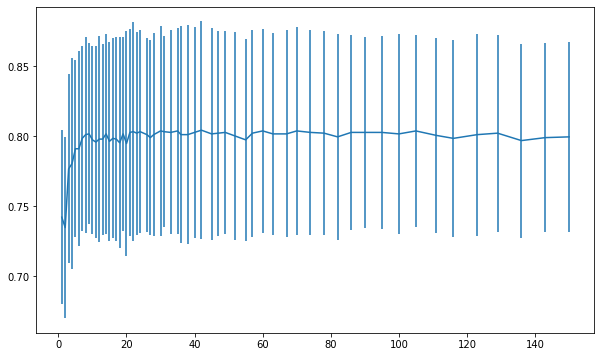

Nicotine-Cannabis
{'n_neighbors': 52}


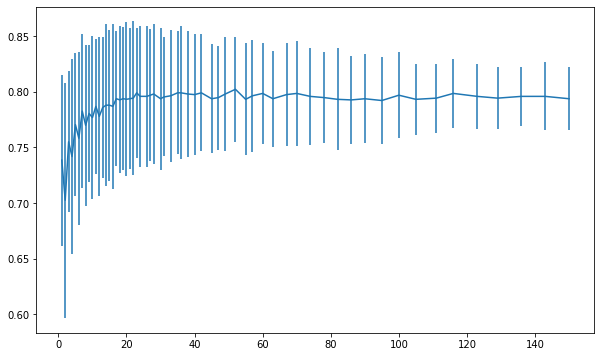

Meth-VSA-Ketamine-Heroin-Crack-AMyl
{'n_neighbors': 11}


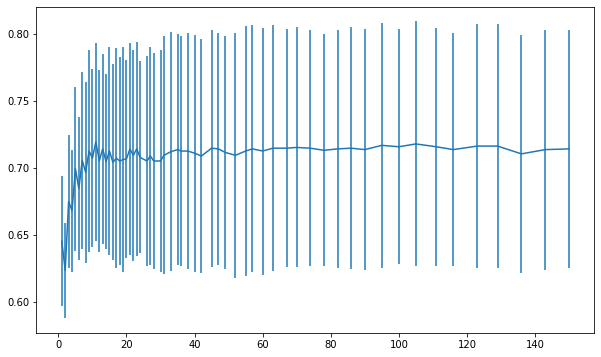

Coke-Ectasy
{'n_neighbors': 150}


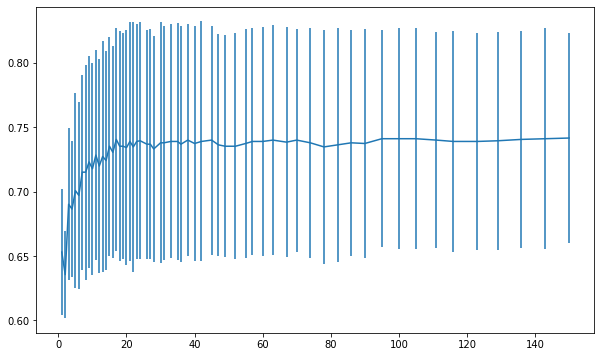

In [ ]:
#hyper paramètres GridSearchCV
#K-PPV e

from sklearn.model_selection import GridSearchCV

# De 1 à 500 voisins (exclu), échelle logarithmique
n_neighbors_list = np.unique(np.round(np.geomspace(1, 150, 100)).astype(int))

for drug_class, prediction in predictions:
  print(drug_class)
  param_grid = {"n_neighbors": n_neighbors_list}
  cls = KNeighborsClassifier()
  search = GridSearchCV(cls, param_grid=param_grid, scoring="accuracy", cv=10)
  search.fit(ACP_data_10, prediction)
  print(search.best_params_)

  dfgrid = pd.DataFrame(
    dict(n_neighbors = d["n_neighbors"], error=e, std=s)
    for d, e, s in zip(
        search.cv_results_["params"],
        search.cv_results_["mean_test_score"],
        search.cv_results_["std_test_score"])
    )
  plt.errorbar(dfgrid["n_neighbors"], dfgrid["error"], yerr=dfgrid["std"])
  plt.show()


In [ ]:
#hyper paramètres GridSearchCV
# RandomForestClassifier, adaboost

cls=[RandomForestClassifier(),AdaBoostClassifier()]
for cl in cls:
  if cl==RandomForestClassifier():
    param_grid={
      'criterion': ['gini', 'entropy'],
      'n_estimators':np.unique(np.round(np.geomspace(1, 300, 100)).astype(int))
  }
  else:
    param_grid={
      'n_estimators':np.unique(np.round(np.geomspace(1, 300, 100)).astype(int))
  }
  for drug_class, prediction in predictions:
    search = GridSearchCV(cl, param_grid=param_grid, scoring="accuracy", cv=10)
    search.fit(ACP_data_10, prediction)
    print(drug_class)
    print(search.best_params_)


    dfgrid = pd.DataFrame(
      dict(n_neighbors = d["n_estimators"], error=e, std=s)
      for d, e, s in zip(
          search.cv_results_["params"],
          search.cv_results_["mean_test_score"],
          search.cv_results_["std_test_score"])
      )
    plt.errorbar(dfgrid["n_neighbors"], dfgrid["error"], yerr=dfgrid["std"])
    plt.show()


In [ ]:
#Reseau de neurones
from tensorflow import keras
from sklearn.model_selection import StratifiedKFold

label00 = np.zeros((label0.shape[0],2), dtype=int)
for i, val in enumerate(np.array(label0, dtype=int)):
  label00[i, val] = 1 
label10 = np.zeros((label1.shape[0],2), dtype=int)
for i, val in enumerate(np.array(label1, dtype=int)):
  label10[i, val] = 1 
label20 = np.zeros((label2.shape[0],2), dtype=int)
for i, val in enumerate(np.array(label2, dtype=int)):
  label20[i, val] = 1 
label30 = np.zeros((label3.shape[0],2), dtype=int)
for i, val in enumerate(np.array(label3, dtype=int)):
  label30[i, val] = 1 

skf = StratifiedKFold(n_splits=10)

"""
test = skf.split(x_train, label0)
train, val = test.__next__()

encoder_input = keras.Input(shape=(11), name="Data_vector")
x = keras.layers.Dense(4, activation="relu")(encoder_input)
outputs = keras.layers.Dense(2, activation="relu")(x)
outputs2 = keras.layers.Softmax()(outputs)

model = keras.Model(inputs=encoder_input, outputs=outputs2, name="mnist_model")

model.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)
history = model.fit(np.asarray(x_train[train]).astype('float32'), y_train[train], batch_size=64, epochs=40, validation_split=0.2)
test_scores = model.evaluate(np.asarray(x_train[val]).astype('float32'), y_train[val], verbose=2)
print("Test accuracy:", test_scores[1])
"""
predictions2 = [("LSdD-Mushrooms-Legalh", label00, label0),
               ("Nicotine-Cannabis", label10, label1),
               ("Meth-VSA-Ketamine-Heroin-Crack-AMyl", label20, label2),
               ("Coke-Ectasy", label30, label3)
               ]
result = []

for name, data in [("ACP_10 ", ACP_data_10), ("ACP_9", ACP_data_9), ("Classic_data", classic_data )]:
  for drug_class, prediction, bool_class in predictions2:
        err = []
        for train, val in skf.split(data, bool_class):
          encoder_input = keras.Input(shape=(len(data[0,:])), name="Data_vector")
          x = keras.layers.Dense(4, activation="relu")(encoder_input)
          outputs = keras.layers.Dense(2, activation="relu")(x)
          outputs2 = keras.layers.Softmax()(outputs)
          model = keras.Model(inputs=encoder_input, outputs=outputs2, name="Classifier")
          model.compile(
              loss=keras.losses.CategoricalCrossentropy(),
              optimizer=keras.optimizers.RMSprop(),
              metrics=["accuracy"],
          )
          model.fit(np.asarray(data[train]).astype('float32'), prediction[train], batch_size=64, epochs=20, validation_split=0.2)
          test_scores = model.evaluate(np.asarray(data[val]).astype('float32'), prediction[val], verbose=2)
          err.append(1-test_scores[1])
        result.append((name, drug_class, 'Neural-Network', np.mean(err)))

print(result)


Epoch 1/20
22/22 [==============================] - 1s 9ms/step - loss: 0.7798 - accuracy: 0.4845 - val_loss: 0.7351 - val_accuracy: 0.5412
Epoch 2/20
22/22 [==============================] - 0s 2ms/step - loss: 0.7388 - accuracy: 0.5789 - val_loss: 0.7005 - val_accuracy: 0.5971
Epoch 3/20
22/22 [==============================] - 0s 3ms/step - loss: 0.7063 - accuracy: 0.5981 - val_loss: 0.6701 - val_accuracy: 0.6265
Epoch 4/20
22/22 [==============================] - 0s 2ms/step - loss: 0.6768 - accuracy: 0.6143 - val_loss: 0.6428 - val_accuracy: 0.6471
Epoch 5/20
22/22 [==============================] - 0s 2ms/step - loss: 0.6504 - accuracy: 0.6364 - val_loss: 0.6164 - val_accuracy: 0.6559
Epoch 6/20
22/22 [==============================] - 0s 3ms/step - loss: 0.6268 - accuracy: 0.6556 - val_loss: 0.5936 - val_accuracy: 0.6765
Epoch 7/20
22/22 [==============================] - 0s 3ms/step - loss: 0.6057 - accuracy: 0.6733 - val_loss: 0.5708 - val_accuracy: 0.7000
Epoch 8/20
22/22 [==

In [ ]:
data = df.to_numpy()
x_train = data[:,:13]
y_train = drogBin_tmp[:,4:5]
x_train.shape
y_train.shape
skf = StratifiedKFold(n_splits=10)
for i in skf.split(x_train, y_train):
  print(i)



## Linearisation des consommation

L'objectif de cette partie est de prédire la consommation ou non de drogue en modifiant les CL en modélisant le nombre de chance de consommer chaque drogue, par jour, par exemple une personne étant CL5 va avoir une probabilité de $\frac{1}{7}$ de consommer cette drogue aujourd'hui.

Ainsi l'objectif sera d'obtenir une valeur comprise entre 0 et 1.

Note : Il pourrait être intéressant de linéariser l'échelle.

In [ ]:
cl2p_dict = {
  "CL0": 0,
  "CL1": 1/((10*365.2425)*2), #CL1 est placée artificiellement à mi-chemin de CL0 et CL2
  "CL2": 1/(10*365.2425),
  "CL3": 1/365.2425,
  "CL4": 1/30.436875,
  "CL5": 1/7,
  "CL6": 1/2
}

In [ ]:
drogProba = df[colDrog].apply(lambda x: x.map(cl2p_dict))
dfProba = pd.concat([df[colPersoEtatciv], drogProba], axis=1)

In [ ]:
df[colDrog]

In [ ]:
drogProba

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['Cannabis'])

In [ ]:
plt.hist(dfProba['Cannabis'])

# annexes


## stats descriptives



### distribution n-score

In [ ]:
nscoredist = pd.read_csv(io.StringIO("""
12 1 -3.46436
13 1 -3.15735
14 7 -2.75696
15 4 -2.52197
16 3 -2.42317
17 4 -2.34360
18 10 -2.2184
19 16 -2.0504
20 24 -1.8696
21 31 -1.6916
22 26 -1.5507
23 29 -1.4390
24 35 -1.3282
25 56 -1.1943
26 57 -1.0530
27 65 -0.9210
28 70 -0.7915
29 60 -0.6782
30 61 -0.5801
31 87 -0.4672
32 78 -0.3479
33 68 -0.2464
34 76 -0.1488
35 69 -0.0518
36 73 0.04257
37 67 0.13606
38 63 0.22393
39 66 0.31287
40 80 0.41667
41 61 0.52135
42 77 0.62967
43 49 0.73545
44 51 0.82562
45 37 0.91093
46 67 1.02119
47 27 1.13281
48 49 1.23461
49 40 1.37297
50 24 1.49158
51 27 1.60383
52 17 1.72012
53 20 1.83990
54 15 1.98437
55 11 2.12700
56 10 2.28554
57 6 2.46262
58 3 2.61139
59 5 2.82196
60 2 3.27393"""), sep=" ", names=["nscore", "cases", "value"])

In [ ]:
nscoredist.head()

,nscore,cases,value
0,12,1,-3.46436
1,13,1,-3.15735
2,14,7,-2.75696
3,15,4,-2.52197
4,16,3,-2.42317


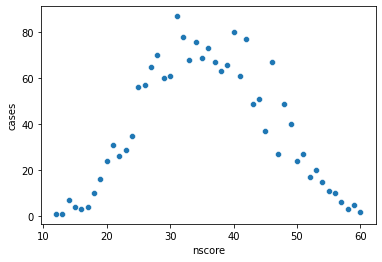

In [ ]:
sns.scatterplot(x='nscore', y='cases', data=nscoredist)

### distribution âge

In [ ]:
agedist = pd.read_csv(io.StringIO("""
-0.95197 18 24 643 0.3411
-0.07854 25 34 481 0.2552
0.49788 35 44 356 0.1889
1.09449 45 54 294 0.1560
1.82213 55 64 93 0.0493
2.59171 65 130 18 0.0095
"""), sep=" ", names=["value", "agemin", "agemax", "cases", "frac"])

In [ ]:
agedist

,value,agemin,agemax,cases,frac
0,-0.95197,18,24,643,0.3411
1,-0.07854,25,34,481,0.2552
2,0.49788,35,44,356,0.1889
3,1.09449,45,54,294,0.1560
4,1.82213,55,64,93,0.0493
5,2.59171,65,130,18,0.0095


In [ ]:
agedist.agemax - agedist.agemin

0     6
1     9
2     9
3     9
4     9
5    65
dtype: int64

<BarContainer object of 6 artists>

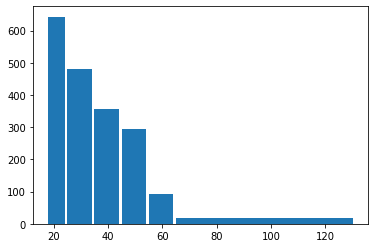

In [ ]:
plt.bar(agedist.agemin, agedist.cases, align="edge", width=(agedist.agemax - agedist.agemin))

### distribution fréquences chocolat
Simulation des dates exactes par loi uniforme.


In [ ]:
distdr1 = pd.read_csv(io.StringIO("""
Class CaffCa CaffFr CannCa CannFr ChocCa ChocFr CokeCa CokeFr
CL0 27 0,0143 413 0,2191 32 0,0170 1038 0,5507
CL1 10 0,0053 207 0,1098 3 0,0016 160 0,0849
CL2 24 0,0127 266 0,1411 10 0,0053 270 0,1432
CL3 60 0,0318 211 0,1119 54 0,0286 258 0,1369
CL4 106 0,0562 140 0,0743 296 0,1570 99 0,0525
CL5 273 0,1448 185 0,0981 683 0,3623 41 0,0218
CL6 1385 0,7347 463 0,2456 807 0,4281 19 0,0101
"""), sep=" ", header=0); distdr1

,Class,CaffCa,CaffFr,CannCa,CannFr,ChocCa,ChocFr,CokeCa,CokeFr
0,CL0,27,"0,0143",413,"0,2191",32,"0,0170",1038,"0,5507"
1,CL1,10,"0,0053",207,"0,1098",3,"0,0016",160,"0,0849"
2,CL2,24,"0,0127",266,"0,1411",10,"0,0053",270,"0,1432"
3,CL3,60,"0,0318",211,"0,1119",54,"0,0286",258,"0,1369"
4,CL4,106,"0,0562",140,"0,0743",296,"0,1570",99,"0,0525"
5,CL5,273,"0,1448",185,"0,0981",683,"0,3623",41,"0,0218"
6,CL6,1385,"0,7347",463,"0,2456",807,"0,4281",19,"0,0101"


In [ ]:
bins = [
[-10, 0],
[-10, -1],
[-1, -1.0/12],
[-1.0/12, -1/35.52],
[-1/35.52, (-1/365)*7],
[(-1/365)*7, -1/365],
[-1/365, 0]
]

bin_edges = [bin[0] for bin in bins]

class2time = {
"CL0": bins[0],
"CL1": bins[1],
"CL2": bins[2],
"CL3": bins[3],
"CL4": bins[4],
"CL5": bins[5],
"CL6": bins[6]
}
class2int = {
    "CL0": 0, "CL1": 1, "CL2": 2, "CL3": 3, "CL4": 4, "CL5": 5, "CL6": 6
}
drugs1 = ["Caff", "Cann", "Choc", "Coke"]
rng = default_rng()
samplesdf = pd.DataFrame(data=None, columns=["Date", "Drug", "CL"])
for dr in drugs1:
  for cl in distdr1.Class:
    newd = pd.DataFrame(data=None)
    newd["Date"] = rng.uniform(low=class2time[cl][0], high=class2time[cl][1], size=distdr1[dr + "Ca"][class2int[cl]])
    newd["Drug"] = dr
    newd["CL"] = cl
    samplesdf = pd.concat([samplesdf, newd], ignore_index=True)

In [ ]:
bin_edges

[-10,
 -10,
 -1,
 -0.08333333333333333,
 -0.02815315315315315,
 -0.019178082191780823,
 -0.0027397260273972603]

In [ ]:
samplescaff = samplesdf[samplesdf["Drug"]=="Caff"]
samplescann = samplesdf[samplesdf["Drug"]=="Cann"]
samplescoke = samplesdf[samplesdf["Drug"]=="Coke"]
sampleschoc = samplesdf[samplesdf["Drug"]=="Choc"]

In [ ]:
samplescaff["Date"]

0      -6.431900
1      -6.409680
2      -1.926133
3      -2.249061
4      -2.369888
          ...   
1880   -0.001676
1881   -0.002018
1882   -0.000728
1883   -0.001561
1884   -0.001095
Name: Date, Length: 1885, dtype: float64

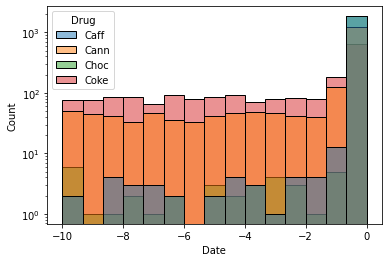

In [ ]:
sns.histplot(data=samplesdf, x="Date", bins=15, log_scale=(False, True), hue="Drug")

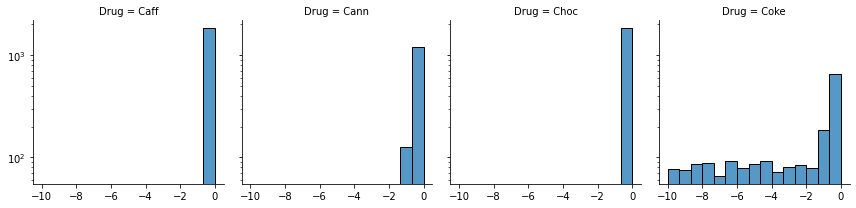

In [ ]:
g = sns.FacetGrid(samplesdf, col="Drug")
g.map_dataframe(sns.histplot, x="Date", bins=15, log_scale=(False, True))

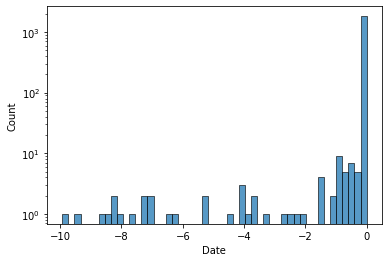

In [ ]:
sns.histplot(data=samplescaff, x="Date", bins=50, log_scale=(False, True))

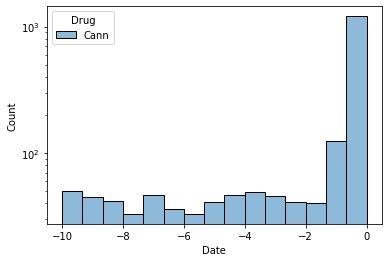

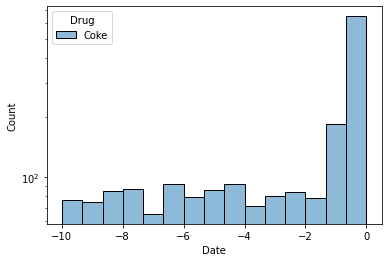